# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [224]:
import sys; print(sys.version)
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tables
import scipy.stats

2.7.12 |Anaconda 4.1.1 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [225]:
p_df = pd.read_csv('progresa_sample.csv')

In [302]:
print p_df.shape
print p_df.columns
print p_df.dtypes

(77250, 21)
Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97'],
      dtype='object')
year               int64
sex              float64
indig            float64
dist_sec         float64
sc               float64
grc              float64
fam_n              int64
min_dist         float64
dist_cap         float64
poor              object
progresa          object
hohedu             int64
hohwag           float64
welfare_index    float64
hohsex           float64
hohage           float64
age                int64
village            int64
folnum             int64
grc97              int64
sc97             float64
dtype: object


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
count,77250.000000,77226.000000,76950.000000,77250.000000,68797.000000,70701.000000,77250.000000,77250.000000,77250.000000,77250.000000,77250.000000,77040.000000,77230.000000,77240.000000,77250.000000,77250.000000,77250.000000,77250.000000,73378.000000
mean,97.500000,0.512211,0.298324,2.418910,0.819818,3.963537,7.215715,103.447520,147.674452,2.768104,586.985312,690.346564,0.925185,44.436717,11.366460,253.614964,19313.000000,3.705372,0.813922
std,0.500003,0.499854,0.457525,2.234109,0.384342,2.499063,2.352900,42.089441,76.063134,2.656106,788.133664,139.491130,0.263095,11.620372,3.167744,149.341967,11150.149239,2.572387,0.389172
min,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.465392,9.465392,0.000000,0.000000,180.000000,0.000000,15.000000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,97.000000,0.000000,0.000000,0.574000,1.000000,2.000000,6.000000,70.518238,92.327050,0.000000,120.000000,597.000000,1.000000,36.000000,9.000000,126.000000,9657.000000,1.000000,1.000000
50%,97.500000,1.000000,0.000000,2.279000,1.000000,4.000000,7.000000,111.228612,132.001494,2.000000,500.000000,685.000000,1.000000,43.000000,11.000000,257.000000,19313.000000,4.000000,1.000000
75%,98.000000,1.000000,1.000000,3.582000,1.000000,6.000000,9.000000,138.446009,184.445225,4.000000,750.000000,770.000000,1.000000,51.000000,14.000000,385.000000,28969.000000,6.000000,1.000000
max,98.000000,1.000000,1.000000,14.879000,1.000000,14.000000,24.000000,170.457647,359.774457,20.000000,14000.000000,1294.000000,1.000000,98.000000,17.000000,505.000000,38625.000000,14.000000,1.000000


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [227]:
p_df.apply(lambda x: sum(x.isnull().values), axis = 0) # 0 for columns and 1 for rows

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [228]:
describe = p_df.describe()
describe1 = describe.loc[["mean",'std'],:].drop(['year','folnum','village'], axis = 1)
describe1.transpose().sort_index()

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [229]:
# Select data from the year 1997 and for individuals who are poor
p1_df = p_df[p_df.year == 97] # Dataset for year 1997 to be used for later questions
p2_df = p1_df[p1_df.poor =='pobre']

# Remove columns year, folnum and village
p3_df = p2_df.drop(['poor','year','folnum','village'], axis = 1)


In [230]:
# Create dictionary to make a data frame
dict = {'Variable name': [],'Average value (Treatment Villages)':[], 'Average value (Control Villages)': [], 'Difference (Treat-Control)':[], '(t-Statistic, p-value)':[]}   



In [231]:
# Create two different dataframes for Control and Treated and remove column progresa
p_control = p3_df[p3_df.progresa == '0'].drop(['progresa'], axis = 1)
p_treat = p3_df[p3_df.progresa == 'basal'].drop(['progresa'], axis = 1)


In [232]:
#loop to get data to fill the empty data frame
from scipy.stats import ttest_ind

for column in p_control:
    dict['Variable name'].append(column)
    dict['Average value (Control Villages)'].append(round(p_control[column].dropna().mean(), 5))

for column in p_treat:
    dict['Average value (Treatment Villages)'].append(round(p_treat[column].dropna().mean(),5))
    
for i in range(len(dic['Variable name'])):
    dict['Difference (Treat-Control)'].append(round((dict['Average value (Treatment Villages)'][i] - dict['Average value (Control Villages)'][i]), 5))
    dict['(t-Statistic, p-value)'].append(ttest_ind(p_treat[dict['Variable name'][i]].dropna(), p_control[dict['Variable name'][i]].dropna())) # two-tailed T-test, assuming the two sets of data have equal variances 

result1_df = pd.DataFrame(dict, columns=['Variable name','Average value (Treatment Villages)', 'Average value (Control Villages)', 'Difference (Treat-Control)', '(t-Statistic, p-value)'])

result1_df

,Variable name,Average value (Treatment Villages),Average value (Control Villages),Difference (Treat-Control),"(t-Statistic, p-value)"
0,sex,0.51932,0.50505,0.01427,"(2.50668556951, 0.0121917217538)"
1,indig,0.32599,0.33221,-0.00622,"(-1.16171359338, 0.245360334075)"
2,dist_sec,2.45312,2.50766,-0.05454,"(-2.10043276993, 0.035698428274)"
3,sc,0.82270,0.81519,0.00751,"(1.6687449766, 0.0951780559146)"
4,grc,3.53160,3.54305,-0.01145,"(-0.400195566008, 0.689015094869)"
5,fam_n,7.28133,7.30247,-0.02114,"(-0.794167083293, 0.427103932752)"
6,min_dist,107.15291,103.23785,3.91506,"(8.20658411284, 2.35831227554e-16)"
7,dist_cap,150.82907,153.76973,-2.94066,"(-3.33908066454, 0.000841500527629)"
8,hohedu,2.66314,2.59035,0.07279,"(2.54122906822, 0.0110509314539)"
9,hohwag,544.33954,573.16356,-28.82402,"(-3.59458761274, 0.000325383514241)"


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Answer:
1.3.A. Yes, there are statistically significant differences between treatment and control villages at baseline, evident by a p-value of less than 0.05 for the variables described below:
1.Sex of the child
2.Indegenous
3.Nearest distance to a secondary school
4.Min distance to urban center
5.Min distance to the capital
6.Years of schooling of head of household
7.Monthly wages of head of household
8.Welfare_index used to classify poor
9.age of head of household


Answer: 1.3.B. To understand the true effect of the treatment, it is important to randomize the selection of control and treated groups. This is done to eliminate bias and create two homogenous groups with minimal differences between the two groups at baseline.
If there are significant differences between the treated and the control groups before the treatment, then it introduces bias and creates an opportunity for confounding variables to influence the result of the treatment.

Answer: 1.3.C. This implies that we cannot use cross-sectional estimators to analyze the effect of the treatment as the control groups are not real controls (as there are other differences between control and treated groups). Difference-in-difference may be a better way to measure the impact of the treatment. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

    hohedu  Enrollment rate
0        0         0.776137
1        1         0.768537
2        2         0.794552
3        3         0.802956
4        4         0.842951
5        5         0.849835
6        6         0.878469
7        7         0.889535
8        8         0.900000
9        9         0.925023
10      10         0.865385
11      11         0.974359
12      12         0.982955
13      13         0.959459
14      14         0.880952
15      15         0.900000
16      16         0.941176
17      17         0.933333
18      18         1.000000
19      20         0.500000


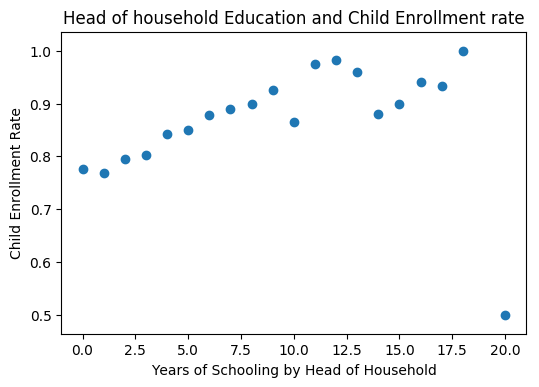

In [233]:
p4_df = pd.DataFrame({'Enrollment rate': p1_df.groupby('hohedu').sc.mean()}).reset_index()
print p4_df
plt.scatter(p4_df['hohedu'], p4_df['Enrollment rate'])
plt.title('Head of household Education and Child Enrollment rate')
plt.ylabel('Child Enrollment Rate')
plt.xlabel('Years of Schooling by Head of Household')
plt.show()

Barring some exceptions, generally the Child's enrollment rate increases as the education level of the head of household increases. In other words, the more the number of years of schooling by the head of household, the more their child's enrollment rate will be.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

In [234]:
# creating some filtered datasets
p5_df = pd.DataFrame({'Average Enrollment rate': p2_df.groupby('village').sc.mean()}).reset_index() # p2_dt is dataset of year 1997 and poor

p6_df = p_df[(p_df.year == 98) & (p_df.poor =='pobre')] # Dataset of year 1998 and poor
p7_df = pd.DataFrame({'Average Enrollment rate': p6_df.groupby('village').sc.mean()}).reset_index() 



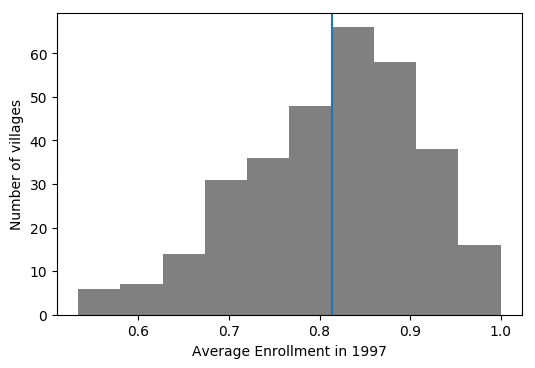

In [250]:
before = p_df[(p_df.poor=='pobre')&(p_df.year==97)&(p_df.progresa=='basal')].groupby(['village']).mean()
#print(before)
#Plot histogram for 1997
fig = plt.figure()
ax = plt.hist(before.sc,color= "grey")
plt.ylabel("Number of villages")
plt.xlabel("Average Enrollment in 1997")
plt.axvline(before.sc.mean())

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [194]:
#Create two different dataframes for Control and Treated  from the 1998, poor dataset p6_df
p98_control = p6_df[p6_df.progresa == '0']
p98_treat = p6_df[p6_df.progresa == 'basal']
controlERate = p98_control['sc'].dropna().mean()
treatERate = p98_treat['sc'].dropna().mean()
dict = {"Average enrollment Rate (Control Villages)": [],"Average enrollment Rate (Treated Villages)": [],"Simple difference": [], "T-Test": []}
dict["Average enrollment Rate (Control Villages)"].append(controlERate)
dict["Average enrollment Rate (Treated Villages)"].append(treatERate)
dict["Simple difference"].append(treatERate - controlERate)
dict["T-Test"].append(ttest_ind(p98_treat['sc'].dropna(),p98_control['sc'].dropna()))


result2_df = pd.DataFrame(dict, columns=['Average enrollment Rate (Control Villages)','Average enrollment Rate (Treated Villages)', 'Simple difference', 'T-Test'])

result2_df


,Average enrollment Rate (Control Villages),Average enrollment Rate (Treated Villages),Simple difference,T-Test
0,0.807637,0.846479,0.038842,"(8.35872056742, 6.63634444752e-17)"


Answer 2.1: 
    The average enrollment rates in control and Treatment Villages, and the simple difference between them and the T-Test value (T-test statistic, p-value) is given in the table above. 
    
    This is similar to the D1 difference estimator: Program-Control Differences in outcomes among Comparable-Eligible (poor) Groups mentioned in the Schultz(2004) paper.
    
    The p-value is less than 0.05 and so by t-test, the average enrollement rates are statistically significantly different. But I know that there were baseline differences between control and treated group. 
    
    Therefore, I will not conclude that progresa treatment was fully responsible for the differences in the enrollment rate in the control and treated villages.


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [252]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sc ~ progresa', data=p6_df).fit()

# print the coefficients
lm.params

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 02 May 2017   Prob (F-statistic):           6.64e-17
Time:                        14:51:20   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer.2.2. Progresa increases the likelihood of a child enrolling by 0.038 (SE 0.005). No we cannot reject the null hypothesis based on this. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [253]:
# create a fitted model with all three features
lm2 = smf.ols(formula='sc ~ progresa + age + dist_sec + sex + hohedu + indig', data=p6_df).fit()
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1666.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        15:02:09   Log-Likelihood:                -7671.8
No. Observations:               27340   AIC:                         1.536e+04
Df Residuals:                   27333   BIC:                         1.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.5235      0.009    161.784      0.000         1.505     1.542
progresa[T.basal]     0.0356      0.004      8.920      0.000         0.028     0.043
age                  -0.0655      0.001    -95.686      0.000        -0.067    -0.064
dist_sec             -0.0119      0.001    -13.642      0.000        -0.014    -0.010
sex                   0.0310      0.004      7.995      0.000         0.023     0.039
hohedu                0.0087      0.001     11.147      0.000         0.007     0.010
indig                 0.0468      0.004     11.306      0.000         0.039     0.055
==============================================================================
Omnibus:                     2974.429   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4048.759
Skew:                          -0.935   Prob(JB):                         0.00
Kurtosis:                       3.239   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding more controls asn performing multiple regression decreases the coefficient of progresa a little.
The coefficient of Progresa from simple difference regression is 0.038 (SE 0.005).
Whereas, the coefficient of Progresa from multiple regression is 0.035 (SE 0.004).
The coefficient is a measure of the impact of progresa on enrollment rate. Multiple regression decreases the impact a little but SE also decreases a little from 0.005 to 0.004, meaning there is less error and the estimate of impact is more accurate. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [290]:
p8_df = p_df[p_df.poor =='pobre'] # original dataset filtering on poor

#filter on year 98 and treatment and control
p98treat_df = p8_df[(p8_df.year == 98) & (p8_df.progresa == 'basal')]
p98control_df = p8_df[(p8_df.year == 98) & (p8_df.progresa == '0')]

#filter on year 97 and treatment and control
p97treat_df = p8_df[(p8_df.year == 97) & (p8_df.progresa == 'basal')]
p97control_df = p8_df[(p8_df.year == 97) & (p8_df.progresa == '0')]

a = p98treat_df.sc.mean()
b = p98control_df.sc.mean()
c = p97treat_df.sc.mean()
d = p97control_df.sc.mean()

d_in_d = (a-c)-(b-d)
d_in_d


0.031331280319323085

Answer.2.4. The estimate of the impact by difference-in difference is 0.03133. The estimate of the impact by simple difference is 0.038842, which is slightly larger than the diff-in-diff estimate.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [313]:
p9_df = p_df[p_df.poor =='pobre']
# replace year 98 with 1 and year 97 with 0
year = []
for column in p8_df.year:
    if column == 98: 
        year.append(1)
    elif column == 97:
        year.append(0)
# replace progresa 'basal' with 1 
progresa = []
for column in p8_df.progresa:
    if column == 'basal':
        progresa.append(1)
    elif column == '0':
        progresa.append(0)
        
# replace columns year and progresa
p9_df.year = year
p9_df.progresa = progresa

#multiple regression on the difference-in-difference framework
lm3 = smf.ols(formula='sc ~ progresa*year + progresa + year+ age + dist_sec + sex + hohedu + indig', data=p9_df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2810.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        19:07:03   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58156   BIC:                         3.353e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4940      0.006    231.606      0.000         1.481     1.507
progresa          0.0043      0.004      1.137      0.256        -0.003     0.012
year              0.0270      0.004      6.204      0.000         0.018     0.036
progresa:year     0.0314      0.006      5.685      0.000         0.021     0.042
age              -0.0655      0.000   -144.433      0.000        -0.066    -0.065
dist_sec         -0.0110      0.001    -17.788      0.000        -0.012    -0.010
sex               0.0339      0.003     12.672      0.000         0.029     0.039
hohedu            0.0076      0.001     14.110      0.000         0.007     0.009
indig             0.0496      0.003     17.304      0.000         0.044     0.055
==============================================================================
Omnibus:                     5523.777   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7269.312
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                       3.113   Cond. No.                         70.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 - What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
 
    Answer: The 'progresa:year' variable has a coefficient of 0.0314 (SE 0.006),the coefficient is the effect of progresa on enrollment taking into consideration the baseline differences between the treatment and control groups. According to the difference-in-difference regression the impact of progresa on enrollment rate is 0.0314.
  
  
 
  - How do these estimates of the treatment effect compare to the estimates based on the simple difference?
  
    Answer:  The coefficient and impact of progresa calculated by diff-in-diff regression is 0.314, which is lower than the estimate of impact of progresa calculated by simple difference which is 0.038842.
  
  
  
   - How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
   
    Answer:  The coefficient and impact of progresa calculated by diff-in-diff regression is 0.314, which is slightly more than the estimate of impact of progresa calculated by difference-in-difference calculation which is 0.0313312. 
I think the diff-in-diff regression also takes into account the effect of other confounding variables such as gender, head of household education etc, therefore is more accurate that just diff-in-diff calculation. 
   
   
   
   - What is the counterfactual assumption underlying this regression?
  
    Answer: The conterfactual assumption is that if progressa does not impact enrollment, then the enrollment rates will be the same among control and treated groups. Therefore any difference in the enrollemnt rates between the two groups is only due to progresa treatment while in reality there could be other confounding variables that could also influence enrollment rate independent of progresa.
  


### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [312]:
p10_df = p_df[p_df.year == 98]

# replace year  pobre with 1 and no pobre with 0
poor = []
for column in p10_df.poor:
    if column == 'pobre': 
        poor.append(1)
    elif column == 'no pobre':
        poor.append(0)
        
# replace progresa 'basal' with 1 
progresa = []
for column in p10_df.progresa:
    if column == 'basal':
        progresa.append(1)
    elif column == '0':
        progresa.append(0)
        
# replace columns year and progresa
p10_df.poor = poor
p10_df.progresa = progresa

p10_df.head()

#multiple regression on the difference-in-difference framework
lm4 = smf.ols(formula='sc ~ progresa*poor + progresa + poor + age + dist_sec + sex + hohedu + indig', data=p10_df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1467.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        19:06:30   Log-Likelihood:                -9335.6
No. Observations:               31975   AIC:                         1.869e+04
Df Residuals:                   31966   BIC:                         1.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5423      0.012    133.418      0.000         1.520     1.565
progresa          0.0261      0.010      2.680      0.007         0.007     0.045
poor             -0.0154      0.008     -1.863      0.063        -0.032     0.001
progresa:poor     0.0095      0.011      0.901      0.368        -0.011     0.030
age              -0.0659      0.001   -103.053      0.000        -0.067    -0.065
dist_sec         -0.0122      0.001    -14.636      0.000        -0.014    -0.011
sex               0.0311      0.004      8.571      0.000         0.024     0.038
hohedu            0.0093      0.001     13.414      0.000         0.008     0.011
indig             0.0474      0.004     11.797      0.000         0.040     0.055
==============================================================================
Omnibus:                     3219.038   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4302.755
Skew:                          -0.897   Prob(JB):                         0.00
Kurtosis:                       3.119   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* How would we estimate this version of the treatment effects in a regression model?

    Answer: The coefficient of this regression is 0.0095 (SE 0.011) which is smaller than the previous difference-in-difference regression coefficient which is 0.0314.This estimate is the impact of progressa on enrollment rates taking into account the differences in enrollemnt rates between poor and non-poor groups across control and treated groups and some more confounding variables. This method decreases the impact of progresa on enrollment seen only in the poor group, therefore, it dilutes the actual effect of progresa.
     
    
* What is the counterfactual assumption underlying this regression?

    Answer: In the absence of progresa the enrollemnt rates of treatment and control groups will be the same whether the family is poor or not poor.


        
* How do these treatment effects compare to the estimates above?

    Answer: By including poor and non-poor families in the same treatment and control group, decreases the impact of progresa on enrollment rate which is 0.314 (by diff-in-diff regression method) to 0.0095.
        
        
        
* Discuss some possible explanations for differences or similarities 

    Answer: The progresa program is a way for poor families to augment their income by sending their children to school. This additional income is an incentive by the government to send children to school and the longer they are in school, more money they get from the government. For a non-poor family the additional income will not be a good enough incentive to send the child to school. Therefore, by including both poor and non-poor families together in the control and treated groups, we are diluting(decreasing) the actual impact of progressa on enrollemnt rates in poor families.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [315]:
p11_df = p_df[p_df.poor =='no pobre']
# replace year 98 with 1 and year 97 with 0
year = []
for column in p11_df.year:
    if column == 98: 
        year.append(1)
    elif column == 97:
        year.append(0)
# replace progresa 'basal' with 1 
progresa = []
for column in p11_df.progresa:
    if column == 'basal':
        progresa.append(1)
    elif column == '0':
        progresa.append(0)
        
# replace columns year and progresa
p11_df.year = year
p11_df.progresa = progresa

#multiple regression on the difference-in-difference framework
lm5 = smf.ols(formula='sc ~ progresa*year + progresa + year+ age + dist_sec + sex + hohedu + indig', data=p11_df).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     513.2
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        19:32:02   Log-Likelihood:                -3700.6
No. Observations:               10378   AIC:                             7419.
Df Residuals:                   10369   BIC:                             7484.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5405      0.017     91.982      0.000         1.508     1.573
progresa          0.0271      0.009      2.911      0.004         0.009     0.045
year              0.0380      0.011      3.512      0.000         0.017     0.059
progresa:year    -0.0017      0.014     -0.122      0.903        -0.029     0.026
age              -0.0683      0.001    -60.075      0.000        -0.071    -0.066
dist_sec         -0.0164      0.002     -9.276      0.000        -0.020    -0.013
sex               0.0306      0.007      4.500      0.000         0.017     0.044
hohedu            0.0100      0.001      9.305      0.000         0.008     0.012
indig             0.0390      0.010      3.834      0.000         0.019     0.059
==============================================================================
Omnibus:                      846.374   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.967
Skew:                          -0.631   Prob(JB):                    5.36e-179
Kurtosis:                       2.448   Cond. No.                         75.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
    
    Answer: Progresa may have created awareness programs among the public which may have motivated the non-poor families to send the children to school.
    
    
    B: Do you observe any impacts of PROGRESA on the non-poor?
    
    Answer: The coefficient of 'progresa:year' is -0.0017(SE 0.014). Progresa did cause an increase in enrollment rate among the non-poor families. 
    
    
    
    C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.
    Answer: Progresa program indirectly by awareness programs or other means could cause an increase in the enrollment rates of children in non-poor families even though they do not get any cash benefits from the government.


### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Yes, Progresa has a causal effect on the enrollment rates of children in the poor families in Mexico. 
The estimate of the impact of progresa analyzed by simple difference is not an accurate representation of the impact of progresa treatment as there were significant differences between the control and treated groups at baseline. Therefore a difference-in-difference is better method in assessing the impact of progresa. Progresa causes a 3.1-3.4% increase in enrollemnt rates in poor households by the difference-in-difference regression methods.